In [350]:
import sympy as sym
import sympy.printing as printing
from sympy.printing.latex import print_latex
MAGNETIC_PERMEABILITY = 12.57e-7
TtoAm = 795774.715459


# Symbolic computation

In [468]:
theta, phi, lamb, omega = sym.symbols('Theta Phi Lambda Omega')
alpha1, alpha2, gamma, mu = sym.symbols("alpha_1 alpha_2 gamma \mu")
torque_par, torque_per = sym.symbols("tau_1 tau_2")
K1, K2 = sym.symbols("K1 K2")
Hoe = sym.symbols("H_oe")

"""
Theta, azimuth L1
Phi, inplane L1

Lambda, azimuth L1
Omega, inplane L2
"""

sinT = sym.sin(theta)
cosT = sym.cos(theta)

cosL = sym.cos(lamb)
sinL = sym.sin(lamb)

sinO = sym.sin(omega)
cosO = sym.cos(omega)

sinP = sym.sin(phi)
cosP = sym.cos(phi)

cosPO = sym.cos(phi - omega)
sinPO = sym.sin(phi - omega)


Ms1, Ms2 = sym.symbols("M_s1 M_s2")

const1 = (gamma / Ms1) * (1 / (1 + alpha1**2))
const2 = (gamma / Ms2) * (1 / (1 + alpha2**2))


# Ho1, Ho2, Ho3 = sym.symbols("H_oe1 H_oe2 H_oe3")
# He1, He2, He3 = sym.symbols("H_ext1 H_ext2 H_ext3")
# Hd11, Hd12, Hd13 = sym.symbols("H_{dip11} H_{dip12} H_{dip13}")
# Hd21, Hd22, Hd23 = sym.symbols("H_{dip21} H_{dip22} H_{dip23}")
# Hde11, Hde12, Hde13 = sym.symbols("H_{de11} H_{de12} H_{de13}")
# Hde21, Hde22, Hde23 = sym.symbols("H_{de21} H_{de22} H_{de23}")

# Hoe = sym.Matrix([Ho1, Ho2, Ho3])
# Hext = sym.Matrix([He1, He2, He3])

M1 = sym.Matrix([Ms1 * sinT * cosP, Ms1 * sinT * sinP, Ms1 * cosT])
M2 = sym.Matrix([Ms2 * sinL * cosO, Ms2 * sinL * sinO, Ms2 * cosL])

demagTensor1 = sym.MatrixSymbol("Do", 3, 3)
demagTensor2 = sym.MatrixSymbol("Dt", 3, 3)
dipoleTensor12 = sym.MatrixSymbol("No", 3, 3)
dipoleTensor21 = sym.MatrixSymbol("Nt", 3, 3)


Hext = sym.MatrixSymbol("He", 3, 1)

Hdemag1 = demagTensor1 * M1/mu
Hdemag2 = demagTensor2 * M2/mu

Hdipole1 = sym.Matrix(dipoleTensor21) * M1/mu
Hdipole2 = sym.Matrix(dipoleTensor12) * M2/mu

anisotropies = K1 * (cosT**2 + (sinT**2) *
                     (sinP**2)) + K2 * (cosL**2 + (sinL**2) * (sinO**2))
# dipole = -M1.dot(Hdip2) - M2.dot(Hdip1)
# demag = -M1.dot(Hdemag1) - M2.dot(Hdemag2)
# ext = -M1.dot(Hext) - M2.dot(Hext)
"""
Can't figure out the part below for the Matrix Symbol
"""
dipole = -M1.T*Hdipole2 - M2.T*Hdipole1
demag = -M1.T*Hdemag1 - M2.T*Hdemag2
ext = -M1.T*Hext - M2.T*Hext

energy = (anisotropies*sym.Identity(1) + dipole + demag + ext).as_explicit()[0]
dUdP = sym.diff(energy, phi)
dUdT = sym.diff(energy, theta)
dUdO = sym.diff(energy, omega)
dUdL = sym.diff(energy, lamb)
"""
.as_explicit to see the actual form
"""
energy

K1*(sin(Phi)**2*sin(Theta)**2 + cos(Theta)**2) + K2*(sin(Lambda)**2*sin(Omega)**2 + cos(Lambda)**2) - M_s1*sin(Phi)*sin(Theta)*He[1, 0] - M_s1*sin(Theta)*cos(Phi)*He[0, 0] - M_s1*cos(Theta)*He[2, 0] - M_s1*(M_s2*sin(Lambda)*sin(Omega)*No[0, 1] + M_s2*sin(Lambda)*cos(Omega)*No[0, 0] + M_s2*cos(Lambda)*No[0, 2])*sin(Theta)*cos(Phi)/\mu - M_s1*(M_s2*sin(Lambda)*sin(Omega)*No[1, 1] + M_s2*sin(Lambda)*cos(Omega)*No[1, 0] + M_s2*cos(Lambda)*No[1, 2])*sin(Phi)*sin(Theta)/\mu - M_s1*(M_s2*sin(Lambda)*sin(Omega)*No[2, 1] + M_s2*sin(Lambda)*cos(Omega)*No[2, 0] + M_s2*cos(Lambda)*No[2, 2])*cos(Theta)/\mu - M_s2*sin(Lambda)*sin(Omega)*He[1, 0] - M_s2*sin(Lambda)*cos(Omega)*He[0, 0] - M_s2*cos(Lambda)*He[2, 0] - M_s2*(M_s1*sin(Phi)*sin(Theta)*Nt[0, 1] + M_s1*sin(Theta)*cos(Phi)*Nt[0, 0] + M_s1*cos(Theta)*Nt[0, 2])*sin(Lambda)*cos(Omega)/\mu - M_s2*(M_s1*sin(Phi)*sin(Theta)*Nt[1, 1] + M_s1*sin(Theta)*cos(Phi)*Nt[1, 0] + M_s1*cos(Theta)*Nt[1, 2])*sin(Lambda)*sin(Omega)/\mu - M_s2*(M_s1*sin(Phi)*sin(T

In [469]:
dTheta = const1 * ((-1 / sinT)*dUdP - alpha1*dUdT -
                  (cosL * sinT - cosT * sinL * cosPO) *
                  (torque_par + alpha1 * torque_per) - (sinL * sinPO) *
                  (alpha1 * torque_par - torque_per) + Ms1*Hoe)

In [470]:
dPhi = const1 * ((1 / sinT) * dUdT - (alpha1 / (sinT**2)) * dUdP + (1 / sinT) *
                (cosL * sinT - cosT * sinL * cosPO) *
                (alpha1 * torque_par - torque_per) 
                - (1/sinT)*(sinL*sinPO)*(torque_par + alpha1*torque_per) + alpha1*Ms1*Hoe/sinT)

In [471]:
dLam = const2 * ((-1 / sinT)*dUdO - alpha2*dUdL +
                  (-sinL * cosT + sinT * cosL * cosPO) *
                  (torque_par + alpha2 * torque_per) + (sinL * sinPO) *
                  (alpha2 * torque_par + torque_per) + Ms2*Hoe) 

In [472]:
dOmega = const2 * ((1 / sinT) * dUdL - (alpha2 / (sinL**2)) * dUdO - (1 / sinL) *
                (sinL * cosT - sinT *cosL * cosPO) *
                (torque_per - alpha2 * torque_par) 
                + (1/sinL)*(sinT*sinPO)*(torque_par - alpha2*torque_per) + alpha2*Ms2*Hoe/sinL)

In [548]:
sym.diff(dOmega, theta)
# sym.diff(dOmega, phi),
# sym.diff(dOmega, lamb),
# sym.diff(dOmega, omega)

gamma*(-alpha_2*(-M_s1*(-M_s2*sin(Lambda)*sin(Omega)*No[0, 0] + M_s2*sin(Lambda)*cos(Omega)*No[0, 1])*cos(Phi)*cos(Theta)/\mu - M_s1*(-M_s2*sin(Lambda)*sin(Omega)*No[1, 0] + M_s2*sin(Lambda)*cos(Omega)*No[1, 1])*sin(Phi)*cos(Theta)/\mu + M_s1*(-M_s2*sin(Lambda)*sin(Omega)*No[2, 0] + M_s2*sin(Lambda)*cos(Omega)*No[2, 1])*sin(Theta)/\mu + M_s2*(M_s1*sin(Phi)*cos(Theta)*Nt[0, 1] - M_s1*sin(Theta)*Nt[0, 2] + M_s1*cos(Phi)*cos(Theta)*Nt[0, 0])*sin(Lambda)*sin(Omega)/\mu - M_s2*(M_s1*sin(Phi)*cos(Theta)*Nt[1, 1] - M_s1*sin(Theta)*Nt[1, 2] + M_s1*cos(Phi)*cos(Theta)*Nt[1, 0])*sin(Lambda)*cos(Omega)/\mu)/sin(Lambda)**2 - (-alpha_2*tau_1 + tau_2)*(-sin(Lambda)*sin(Theta) - cos(Lambda)*cos(Theta)*cos(Omega - Phi))/sin(Lambda) - (-alpha_2*tau_2 + tau_1)*sin(Omega - Phi)*cos(Theta)/sin(Lambda) + (-M_s1*(-M_s2*sin(Lambda)*No[0, 2] + M_s2*sin(Omega)*cos(Lambda)*No[0, 1] + M_s2*cos(Lambda)*cos(Omega)*No[0, 0])*cos(Phi)*cos(Theta)/\mu - M_s1*(-M_s2*sin(Lambda)*No[1, 2] + M_s2*sin(Omega)*cos(Lambda)*No

## The derivative matrix 

In [473]:
dM = sym.Matrix([
    [
        sym.diff(dTheta, theta),
        sym.diff(dTheta, phi),
        sym.diff(dTheta, lamb),
        sym.diff(dTheta, omega)
    ],
    [
        sym.diff(dPhi, theta),
        sym.diff(dPhi, phi),
        sym.diff(dPhi, lamb),
        sym.diff(dPhi, omega)
    ],
    [
        sym.diff(dLam, theta),
        sym.diff(dLam, phi),
        sym.diff(dLam, lamb),
        sym.diff(dLam, omega)
    ],
    [
        sym.diff(dOmega, theta),
        sym.diff(dOmega, phi),
        sym.diff(dOmega, lamb),
        sym.diff(dOmega, omega)
    ]]
)

In [474]:
e_sub = {
    theta: 1,
    phi: 2,
    lamb: 3,
    omega: 4,
    Ms1: 1 * TtoAm,
    Ms2: 1 * TtoAm,
    Hext: sym.Matrix([1, 1, 2])
}
ext.subs(e_sub)

Matrix([[-795774.715459*sin(1)*cos(2), -795774.715459*sin(1)*sin(2), -795774.715459*cos(1)]])*Matrix([
[1],
[1],
[2]]) + Matrix([[-795774.715459*sin(3)*cos(4), -795774.715459*sin(3)*sin(4), -795774.715459*cos(3)]])*Matrix([
[1],
[1],
[2]])

In [479]:
"""
This contains also the parameter order
"""
sub = {
    theta: 1,
    phi: 2,
    lamb: 3,
    omega: 4,
    # Hoe
    Hoe: 2,
    # Hext
    Hext: sym.Matrix([1, 1, 2]),
    # dipole 1
    dipoleTensor12: sym.Matrix([[1, 1, 1], [1, 1, 1], [1, 1, 1]]),
    # dipole 2
    dipoleTensor21: sym.Matrix([[1, 1, 1], [1, 1, 1], [1, 1, 1]]),
    # demag 1
    demagTensor1: sym.Matrix([[0, 0, 0], [0, 0, 0], [0, 0, 1]]),
    # demag 2
    demagTensor2: sym.Matrix([[0, 0, 0], [0, 0, 0], [0, 0, 1]]),
    gamma: 2.21e5,
    alpha1: 0.035,
    alpha2: 0.035,
    torque_par: 1.0,
    torque_per: 1.0,
    Ms1: 1 * TtoAm,
    Ms2: 1 * TtoAm,
    K1: 350e3,
    K2: 650e3,
    mu: 1
}

# energy.subs(sub)
dM.evalf(subs=sub)

Matrix([
[ 19082768842.6502,  216463977035.488, -593340194101.275, -6881485487.03261],
[-601318715079.415, -346927532120.719,  277019389357.856,  3212836289.22918],
[-16097269743.0496, -23991938245.0383, -38569222703.2419,  78181176112.4285],
[ 655040342853.859,  574440983897.649,  -13111934531.226,  158123140679.777]])

In [480]:
# test the function
dMFunction = sym.lambdify([list(sub.keys())], dM, "numpy")
dMFunction(list(sub.values()))

array([[19082768842.6501, 216463977035.488, -593340194101.275,
        -6881485487.03261],
       [-601318715079.415, -346927532120.719, 277019389357.856,
        3212836289.22918],
       [-16097269743.0496, -23991938245.0383, -38569222703.2418,
        78181176112.4285],
       [655040342853.859, 574440983897.649, -13111934531.2261,
        158123140679.777]], dtype=object)

## The energy function and gradient

In [481]:
energy

K1*(sin(Phi)**2*sin(Theta)**2 + cos(Theta)**2) + K2*(sin(Lambda)**2*sin(Omega)**2 + cos(Lambda)**2) - M_s1*sin(Phi)*sin(Theta)*He[1, 0] - M_s1*sin(Theta)*cos(Phi)*He[0, 0] - M_s1*cos(Theta)*He[2, 0] - M_s1*(M_s2*sin(Lambda)*sin(Omega)*No[0, 1] + M_s2*sin(Lambda)*cos(Omega)*No[0, 0] + M_s2*cos(Lambda)*No[0, 2])*sin(Theta)*cos(Phi)/\mu - M_s1*(M_s2*sin(Lambda)*sin(Omega)*No[1, 1] + M_s2*sin(Lambda)*cos(Omega)*No[1, 0] + M_s2*cos(Lambda)*No[1, 2])*sin(Phi)*sin(Theta)/\mu - M_s1*(M_s2*sin(Lambda)*sin(Omega)*No[2, 1] + M_s2*sin(Lambda)*cos(Omega)*No[2, 0] + M_s2*cos(Lambda)*No[2, 2])*cos(Theta)/\mu - M_s2*sin(Lambda)*sin(Omega)*He[1, 0] - M_s2*sin(Lambda)*cos(Omega)*He[0, 0] - M_s2*cos(Lambda)*He[2, 0] - M_s2*(M_s1*sin(Phi)*sin(Theta)*Nt[0, 1] + M_s1*sin(Theta)*cos(Phi)*Nt[0, 0] + M_s1*cos(Theta)*Nt[0, 2])*sin(Lambda)*cos(Omega)/\mu - M_s2*(M_s1*sin(Phi)*sin(Theta)*Nt[1, 1] + M_s1*sin(Theta)*cos(Phi)*Nt[1, 0] + M_s1*cos(Theta)*Nt[1, 2])*sin(Lambda)*sin(Omega)/\mu - M_s2*(M_s1*sin(Phi)*sin(T

In [482]:
energy.evalf(subs=sub)

633066759164.413

In [483]:
# a vector of energy derivatives w.r.t to each of the angles
energy_gradient = sym.Matrix([
    sym.diff(energy, theta),
    sym.diff(energy, phi),
    sym.diff(energy, lamb),
    sym.diff(energy, omega),
])
energy_gradient.evalf(subs=sub)

Matrix([
[-290120349939.702],
[-1679597492691.22],
[ -1695583609214.2],
[-17613005959.2821]])

In [487]:
energyFunction = sym.lambdify([list(sub.keys())], energy, "numpy")
energyGradientFunction = sym.lambdify([list(sub.keys())], energy_gradient, "numpy")
print(energyGradientFunction(list(sub.values())))

[[-290120349939.702]
 [-1679597492691.22]
 [-1695583609214.20]
 [-17613005959.2821]]


## Numerical optimisations

In [549]:
x0 = {
    theta: to_radian(88),
    phi: to_radian(45),
    lamb: to_radian(88),
    omega: to_radian(45),
    # Hoe
    Hoe: 397.88,
    # Hext
    Hext: np.array([[1], [1], [2]]),
    # dipole 1
    dipoleTensor12: np.array([[0, 0, 0], [1, 1, 1], [1, 1, 1]]),
    # dipole 2
    dipoleTensor21: np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]),
    # demag 1
    demagTensor1: np.array([[0, 0, 0], [0, 0, 0], [0, 0, 1]]),
    # demag 2
    demagTensor2: np.array([[0, 0, 0], [0, 0, 0], [0, 0, 1]]),
    gamma: 2.21e5,
    alpha1: 0.035,
    alpha2: 0.035,
    torque_par: 0.0,
    torque_per: 0.0,
    Ms1: 1 * TtoAm,
    Ms2: 1 * TtoAm,
    K1: 728e3,
    K2: 305e3,
    mu: 1
}
energyGradientFunction(list(x0.values()))

array([[ 1.80939313e+12],
       [-6.48103177e+11],
       [ 1.36161254e+12],
       [ 3.04628517e+05]])

In [563]:
import numpy as np
from scipy.optimize import minimize

MAGNETIC_PERMEABILITY = 12.57e-7
TtoAm = 795774.715459


def opt_wrapper_cost(x, args):
    theta, phi, lamb, omega = x
    return energyFunction([theta, phi, lamb, omega] + args)


def opt_wrapper_grad(x, args):
    theta, phi, lamb, omega = x
    return energyGradientFunction([theta, phi, lamb, omega] + args)


def to_radian(angle):
    return angle * (np.pi / 180)


def get_tensor_interaction(M, N):
    return N @ M


def cartiesian_from_spherical(r, inplane, azimuth):
    return np.array([
        r * np.sin(azimuth) * np.cos(inplane),
        r * np.sin(azimuth) * np.sin(inplane), r * np.cos(azimuth)
    ])


"""
        Spherical coords
        Theta -- azimuth angle, L1
        Phi -- inplane angle, L1
        Lambda -- azimuth angle, L2
        Omega -- inplane angle, L2
"""

x0 = {
    theta: to_radian(90),
    phi: to_radian(45),
    lamb: to_radian(90),
    omega: to_radian(45),
}

hext = np.expand_dims(cartiesian_from_spherical(0.1 * TtoAm, 45, 90), 0).T

arg_set = {
    # Hoe
    Hoe: 397.88,
    # Hext
    Hext: hext,
    # dipole 1
    dipoleTensor12: np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]]),
    # dipole 2
    dipoleTensor21: np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]]),
    # demag 1
    demagTensor1: np.array([[0, 0, 0], [0, 0, 0], [0, 0, 1]]),
    # demag 2
    demagTensor2: np.array([[0, 0, 0], [0, 0, 0], [0, 0, 1]]),
    gamma: 2.21e5,
    alpha1: 0.035,
    alpha2: 0.035,
    torque_par: 0.0,
    torque_per: 0.0,
    Ms1: 1 * TtoAm,
    Ms2: 1 * TtoAm,
    K1: 728e3,
    K2: 305e3,
    mu: 1
}

bounds = [(0, np.pi * 2) for i in range(len(x0))]
res = minimize(opt_wrapper_cost,
               list(x0.values()),
               bounds=bounds,
               args=list(arg_set.values()),
               jac=opt_wrapper_grad,
               tol=1e-4)
res

      fun: -1210478933370.89
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([[-1.35461602e+06],
       [-1.15704970e+09],
       [-1.35459547e+06],
       [-1.15704891e+09]])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 4
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([0.02402134, 6.28318531, 0.02402133, 6.28318531])

In [564]:
matrix_res = dMFunction(res.x.tolist() + list(arg_set.values()))
eigenvalues, eigenvectors = np.linalg.eig(matrix_res)

In [565]:
print(np.unique(np.abs(eigenvalues)/1e9))

[334.18722537 440.14264764 464.17615061]


In [566]:
print(eigenvalues)

[ 4.40142648e+11+0.00000000e+00j -2.90088016e+11+1.65921803e+11j
 -2.90088016e+11-1.65921803e+11j -4.64176151e+11+0.00000000e+00j]


# VSD scan

In [573]:
from tqdm.notebook import tqdm


def find_resonance(Hstart=0.1, Hstop=0.5, N=30):
    x0 = {
        theta: to_radian(90),
        phi: to_radian(45),
        lamb: to_radian(90),
        omega: to_radian(45),
    }
    bounds = [(0, np.pi * 2) for i in range(len(x0))]
    h_space = np.linspace(Hstart, Hstop, N)
    bottom_f, top_f = [], []
    for h in tqdm(h_space):
        hext = np.expand_dims(cartiesian_from_spherical(h * TtoAm, 45, 45),
                              0).T
        arg_set = {
            # Hoe
            Hoe: 397.88,
            # Hext
            Hext: hext,
            # dipole 1
            dipoleTensor12: np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]]),
            # dipole 2
            dipoleTensor21: np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]]),
            # demag 1
            demagTensor1: np.array([[0, 0, 0], [0, 0, 0], [0, 0, 1]]),
            # demag 2
            demagTensor2: np.array([[0, 0, 0], [0, 0, 0], [0, 0, 1]]),
            gamma: 2.21e5,
            alpha1: 0.035,
            alpha2: 0.035,
            torque_par: 0.0,
            torque_per: 0.0,
            Ms1: 1 * TtoAm,
            Ms2: 1 * TtoAm,
            K1: 728e3,
            K2: 305e3,
            mu: 1
        }
        res = minimize(opt_wrapper_cost,
                       list(x0.values()),
                       bounds=bounds,
                       args=list(arg_set.values()),
                       jac=opt_wrapper_grad,
                       tol=1e-4)
        matrix_res = dMFunction(res.x.tolist() + list(arg_set.values()))
#         print(matrix_res)
        eigenvalues, eigenvectors = np.linalg.eig(matrix_res)
        freqs = np.unique(np.abs(eigenvalues) / 1e9)
        bottom_f.append(freqs[0])
        top_f.append(freqs[1])
    return h_space, bottom_f, top_f

  0%|          | 0/30 [00:00<?, ?it/s]

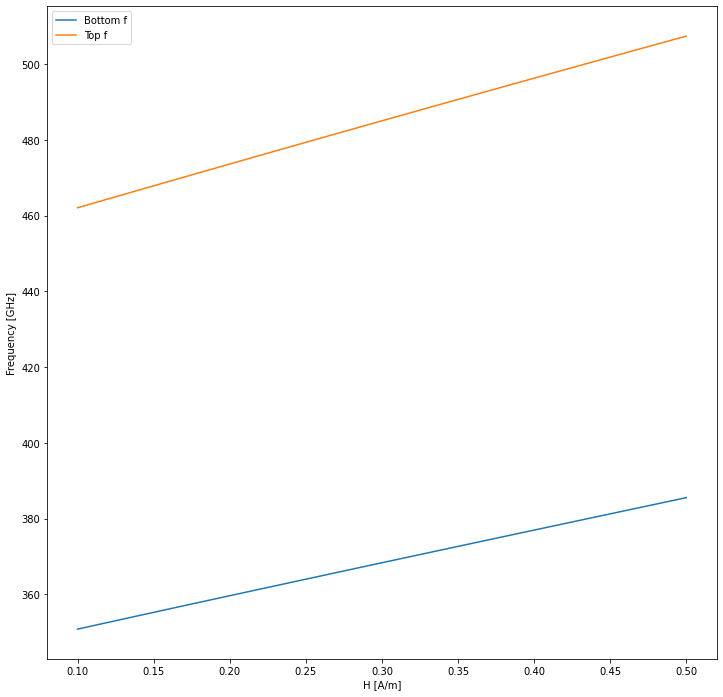

In [574]:
import matplotlib.pyplot as plt
h_space, bottom_f, top_f = find_resonance(N = 30)

fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(h_space, bottom_f, label="Bottom f")
ax.plot(h_space, top_f, label="Top f")
ax.set_xlabel("H [A/m]")
ax.set_ylabel("Frequency [GHz]")
ax.legend()